Step 1: Import Liraries

In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

Combine and Extract visual Features

In [3]:
import os
import zipfile
import pandas as pd

def process_session(session_id, zip_file_path, output_path):
    # Define the filenames within the zip file
    txt_files = [f"{session_id}_CLNF_features.txt", 
                 f"{session_id}_CLNF_features3D.txt", 
                 f"{session_id}_CLNF_gaze.txt", 
                 f"{session_id}_CLNF_pose.txt", 
                 f"{session_id}_CLNF_AUs.txt"]

    # Initialize a dictionary to hold DataFrame objects for each text file
    data_frames = {}

    # Open the zip file and read the text files
    with zipfile.ZipFile(zip_file_path, 'r') as zip_ref:
        for txt_file in txt_files:
            # Check if the file exists in the ZIP archive
            if txt_file not in zip_ref.namelist():
                print(f"File {txt_file} not found in {zip_file_path}")
                continue
            
            # Read the text file into a DataFrame
            with zip_ref.open(txt_file) as file:
                data_frames[txt_file] = pd.read_csv(file, delimiter=',')

    # Combine all DataFrames into a single DataFrame
    combined_df = pd.concat(data_frames.values(), axis=1)

    # Save the combined DataFrame as a CSV file
    csv_file = os.path.join(output_path, f"{session_id}_combined_data.csv")
    combined_df.to_csv(csv_file, index=False)
    print(f"CSV file saved: {csv_file}")

# Define the base path to the dataset directory and the output directory
base_path = 'E:/Daic Woz Dataset'
output_path = 'E:/Daic Woz Dataset/Output'

# Specify the session ID you want to process
session_id = '300'
zip_file_path = os.path.join(base_path, f"{session_id}_P.zip")

# Check if the ZIP file exists
if not os.path.exists(zip_file_path):
    print(f"ZIP file does not exist: {zip_file_path}")
else:
    print(f"Processing ZIP file: {zip_file_path}")
    process_session(session_id, zip_file_path, output_path)

print("Processing completed.")


Processing ZIP file: E:/Daic Woz Dataset\300_P.zip
CSV file saved: E:/Daic Woz Dataset/Output\300_combined_data.csv
Processing completed.


Load Combine data

In [4]:
cmb_data = pd.read_csv('E:/Daic Woz Dataset/Output/300_combined_data.csv')
cmb_data.head(5)

,frame,timestamp,confidence,success,x0,x1,x2,x3,x4,x5,...,AU17_r,AU20_r,AU25_r,AU26_r,AU04_c,AU12_c,AU15_c,AU23_c,AU28_c,AU45_c
0,1,0.000000,0.939744,1,627.755,631.277,638.299,647.668,663.522,686.279,...,0.0,0.0,0.000000,0.0,0,0,0,1,0,0
1,2,0.033333,0.944596,1,626.449,630.076,637.020,645.933,661.343,684.353,...,0.0,0.0,0.000000,0.0,1,0,0,1,0,0
2,3,0.066667,0.947792,1,626.202,629.321,635.614,643.762,658.157,680.616,...,0.0,0.0,0.755136,0.0,1,0,0,1,0,0
3,4,0.100000,0.948344,1,626.005,628.895,634.909,642.659,656.472,678.550,...,0.0,0.0,0.850600,0.0,1,0,0,1,0,1
4,5,0.133333,0.948772,1,625.912,628.728,634.655,642.298,655.964,677.949,...,0.0,0.0,0.689261,0.0,1,0,0,1,0,1


Check Null values

In [5]:
cmb_data.isnull().sum()

frame          0
 timestamp     0
 confidence    0
 success       0
 x0            0
              ..
 AU12_c        0
 AU15_c        0
 AU23_c        0
 AU28_c        0
 AU45_c        0
Length: 398, dtype: int64

Compute measures of central tendency mean,median,mode

In [6]:
# Compute measures of central tendency
mean = cmb_data.mean()
median = cmb_data.median()
mode =cmb_data.mode() 

Calculate measures of variability range,variance,STD

In [7]:
# Calculate measures of variability
data_range = cmb_data.max() -cmb_data.min()
variance = cmb_data.var()
std_deviation = cmb_data.std()

Determine percentiles and quartiles

In [8]:
# Determine percentiles and quartiles
percentiles =cmb_data.quantile([0.25, 0.5, 0.75])
quartiles = cmb_data.describe().loc[['25%', '50%', '75%']]

In [9]:
print("percentiles")
percentiles

percentiles


,frame,timestamp,confidence,success,x0,x1,x2,x3,x4,x5,...,AU17_r,AU20_r,AU25_r,AU26_r,AU04_c,AU12_c,AU15_c,AU23_c,AU28_c,AU45_c
0.25,4865.25,162.14150,0.965117,1.0,526.79225,530.94325,538.26100,548.12950,563.3260,585.87250,...,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0
0.50,9729.50,324.28350,0.970392,1.0,537.52600,541.56950,548.49200,557.93550,572.1935,594.99150,...,0.0,0.0,0.817331,0.0,0.0,0.0,0.0,1.0,0.0,0.0
0.75,14593.75,486.42475,0.974076,1.0,548.98100,551.94125,558.27825,567.71875,582.9270,606.06425,...,0.0,0.0,2.069670,0.0,0.0,0.0,0.0,1.0,0.0,0.0


In [10]:
print("quartiles")
quartiles

quartiles


,frame,timestamp,confidence,success,x0,x1,x2,x3,x4,x5,...,AU17_r,AU20_r,AU25_r,AU26_r,AU04_c,AU12_c,AU15_c,AU23_c,AU28_c,AU45_c
25%,4865.25,162.14150,0.965117,1.0,526.79225,530.94325,538.26100,548.12950,563.3260,585.87250,...,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0
50%,9729.50,324.28350,0.970392,1.0,537.52600,541.56950,548.49200,557.93550,572.1935,594.99150,...,0.0,0.0,0.817331,0.0,0.0,0.0,0.0,1.0,0.0,0.0
75%,14593.75,486.42475,0.974076,1.0,548.98100,551.94125,558.27825,567.71875,582.9270,606.06425,...,0.0,0.0,2.069670,0.0,0.0,0.0,0.0,1.0,0.0,0.0


Evaluate skewness and kurtosis

In [11]:
# Evaluate skewness and kurtosis
skewness = cmb_data.skew()
kurtosis = cmb_data.kurt()

In [12]:
print("skewness")
skewness

skewness


frame          0.000000e+00
 timestamp     1.318547e-10
 confidence   -1.015655e+01
 success      -9.813283e+00
 x0            2.585213e+00
                   ...     
 AU12_c       -6.148710e+00
 AU15_c       -6.144520e+00
 AU23_c       -6.142013e+00
 AU28_c       -6.147493e+00
 AU45_c       -6.142612e+00
Length: 398, dtype: float64

In [13]:
print('kurtosis')
kurtosis

kurtosis


frame           -1.200000
 timestamp      -1.200000
 confidence    111.677290
 success        94.310227
 x0             22.272091
                  ...    
 AU12_c         35.816270
 AU15_c         35.782942
 AU23_c         35.762516
 AU28_c         35.806600
 AU45_c         35.767701
Length: 398, dtype: float64

Summary Of Stats

In [14]:
#generate summary of stats
cmb_data.describe()

,frame,timestamp,confidence,success,x0,x1,x2,x3,x4,x5,...,AU17_r,AU20_r,AU25_r,AU26_r,AU04_c,AU12_c,AU15_c,AU23_c,AU28_c,AU45_c
count,19458.000000,19458.000000,19458.000000,19458.000000,19458.000000,19458.000000,19458.000000,19458.000000,19458.000000,19458.000000,...,19458.000000,19458.000000,19458.000000,19458.000000,19458.000000,19458.000000,19458.000000,19458.000000,19458.000000,19458.000000
mean,9729.500000,324.283333,0.960280,0.989927,540.394479,543.867197,550.519509,560.016768,574.793749,597.411513,...,0.058667,0.169807,1.178580,0.029966,-2.219807,-2.416744,-2.286772,-1.762309,-2.383287,-2.204440
std,5617.185105,187.239504,0.070718,0.099860,29.045747,27.871954,26.817857,25.975475,25.656250,25.647449,...,0.204289,0.329890,1.302923,0.138017,15.506767,15.470932,15.494872,15.580092,15.477202,15.509455
min,1.000000,0.000000,0.009209,0.000000,297.253000,303.287000,313.070000,327.380000,344.387000,367.438000,...,0.000000,0.000000,0.000000,0.000000,-100.000000,-100.000000,-100.000000,-100.000000,-100.000000,-100.000000
25%,4865.250000,162.141500,0.965117,1.000000,526.792250,530.943250,538.261000,548.129500,563.326000,585.872500,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,9729.500000,324.283500,0.970392,1.000000,537.526000,541.569500,548.492000,557.935500,572.193500,594.991500,...,0.000000,0.000000,0.817331,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000
75%,14593.750000,486.424750,0.974076,1.000000,548.981000,551.941250,558.278250,567.718750,582.927000,606.064250,...,0.000000,0.000000,2.069670,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000
max,19458.000000,648.567000,0.984990,1.000000,833.427000,833.712000,837.253000,843.537000,856.129000,878.377000,...,2.198280,3.211960,5.000000,1.510270,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


In [15]:
cmb_data.columns

Index(['frame', ' timestamp', ' confidence', ' success', ' x0', ' x1', ' x2',
       ' x3', ' x4', ' x5',
       ...
       ' AU17_r', ' AU20_r', ' AU25_r', ' AU26_r', ' AU04_c', ' AU12_c',
       ' AU15_c', ' AU23_c', ' AU28_c', ' AU45_c'],
      dtype='object', length=398)

In [16]:
cmb_data.shape

(19458, 398)

Visulization

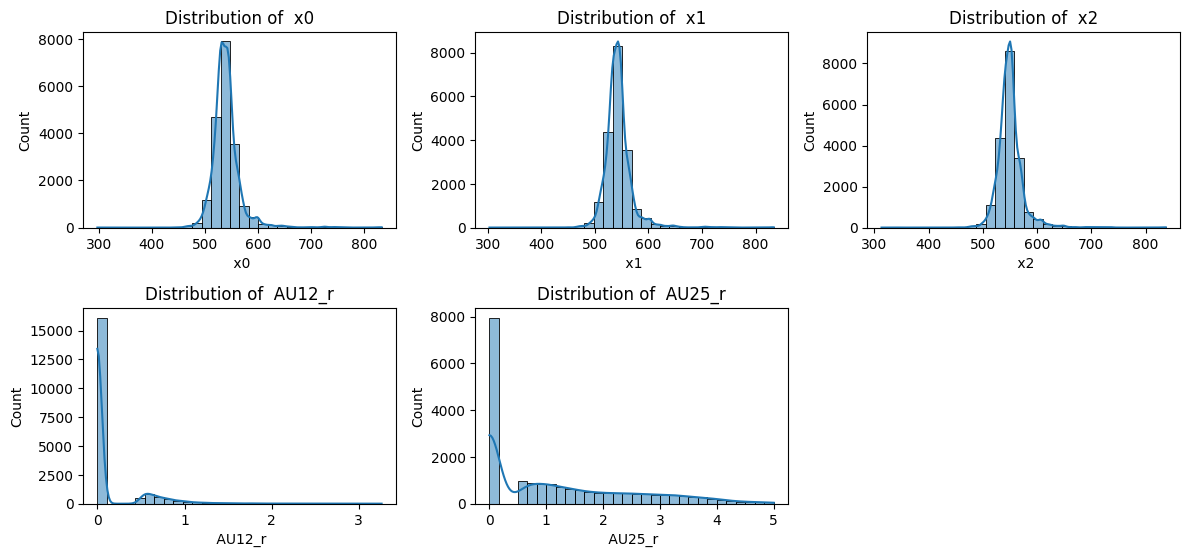

In [19]:
# Distribution plots for selected features
plt.figure(figsize=(12, 8))
for i, column in enumerate(selected_features, 1):
    plt.subplot(3, 3, i)
    sns.histplot(cmb_data[column], bins=30, kde=True)
    plt.title(f"Distribution of {column}")
plt.tight_layout()
plt.show()

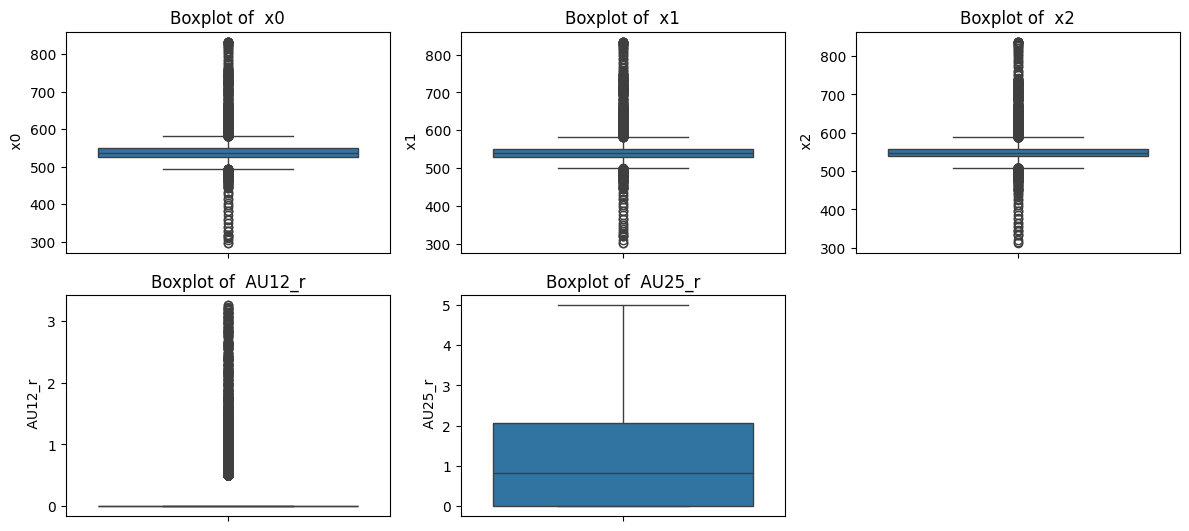

In [20]:
# Boxplots for selected features
plt.figure(figsize=(12, 8))
for i, column in enumerate(selected_features, 1):
    plt.subplot(3, 3, i)
    sns.boxplot(y=cmb_data[column])
    plt.title(f"Boxplot of {column}")
plt.tight_layout()
plt.show()